> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [no show clinic appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.8MB/s eta 0:00:01  2% |▉                               | 266kB 14.3MB/s eta 0:00:01    25% |████████▎                       | 2.7MB 27.2MB/s eta 0:00:01    56% |██████████████████▏             | 5.9MB 24.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.3MB/s eta 0:00:01  5% |█▉                              | 788kB 23.1MB/s eta 0:00:01    15% |█████                           | 2.1MB 27.1MB/s eta 0:00:01    42% |█████████████▌                  | 5.7MB 18.5MB/s eta 0:00:01    51% |████████████████▍               | 6.9MB 27.7MB/s eta 0:00:01    59% |███████████████████▏            | 8.0MB 21.2MB/s eta 0:00:01    86% |███████████████████████████▊    | 11.6MB 26.2MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pand

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [4]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head

<bound method NDFrame.head of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946e+

In [5]:
df.shape

(110527, 14)

In [6]:
df['PatientId'].unique()

array([  2.98724998e+13,   5.58997777e+14,   4.26296230e+12, ...,
         7.26331493e+13,   9.96997666e+14,   1.55766317e+13])

The data consists of 110527 appointments(rows) and 14 columns


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [7]:
#to know data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe

<bound method NDFrame.describe of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.1139

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentDay','ScheduledDay','AppointmentID'],axis=1,inplace=True)
df.head

<bound method NDFrame.head of        Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
0           F   62    JARDIM DA PENHA            0             1         0   
1           M   56    JARDIM DA PENHA            0             0         0   
2           F   62      MATA DA PRAIA            0             0         0   
3           F    8  PONTAL DE CAMBURI            0             0         0   
4           F   56    JARDIM DA PENHA            0             1         1   
5           F   76          REPÚBLICA            0             1         0   
6           F   23         GOIABEIRAS            0             0         0   
7           F   39         GOIABEIRAS            0             0         0   
8           F   21         ANDORINHAS            0             0         0   
9           F   19          CONQUISTA            0             0         0   
10          F   30     NOVA PALESTINA            0             0         0   
11          M   29     NOVA PALEST

In [10]:
#in order to correct the spelling of the word "Hipertension"
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'Handcap':'Handicap'},inplace=True)
df.head

<bound method NDFrame.head of        Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0           F   62    JARDIM DA PENHA            0             1         0   
1           M   56    JARDIM DA PENHA            0             0         0   
2           F   62      MATA DA PRAIA            0             0         0   
3           F    8  PONTAL DE CAMBURI            0             0         0   
4           F   56    JARDIM DA PENHA            0             1         1   
5           F   76          REPÚBLICA            0             1         0   
6           F   23         GOIABEIRAS            0             0         0   
7           F   39         GOIABEIRAS            0             0         0   
8           F   21         ANDORINHAS            0             0         0   
9           F   19          CONQUISTA            0             0         0   
10          F   30     NOVA PALESTINA            0             0         0   
11          M   29     NOVA PALEST

In [11]:
df.rename(columns={'No-show':'No_show'},inplace=True)

In [13]:
mask=df.query('Age=="-1"')
mask

TypeError: __init__() got an unexpected keyword argument 'max_rows'

      Gender  Age Neighbourhood  Scholarship  Hypertension  Diabetes  \
99832      F   -1         ROMÃO            0             0         0   

       Alcoholism  Handicap  SMS_received No_show  
99832           0         0             0      No  

# Summary of Data wrangling:
After completing the step of the data gathering ,:
- I tried to explore the datset by knowing the shape of the data and how many columns and rows are included in this data.
- some corrections were made on the spelling mistakes from the word of (Hipertension) to the correct word of (Hypertension),
   and the word (Handcap) to the word (Handicap).
- removal of unnecessary columns,and unreasonable age number(-1).
- after cleaning the data from unecessary columns
- detection of information and shape of the whole data.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 

> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


# GENERAL OVERVIEW ON THE DATAEST :


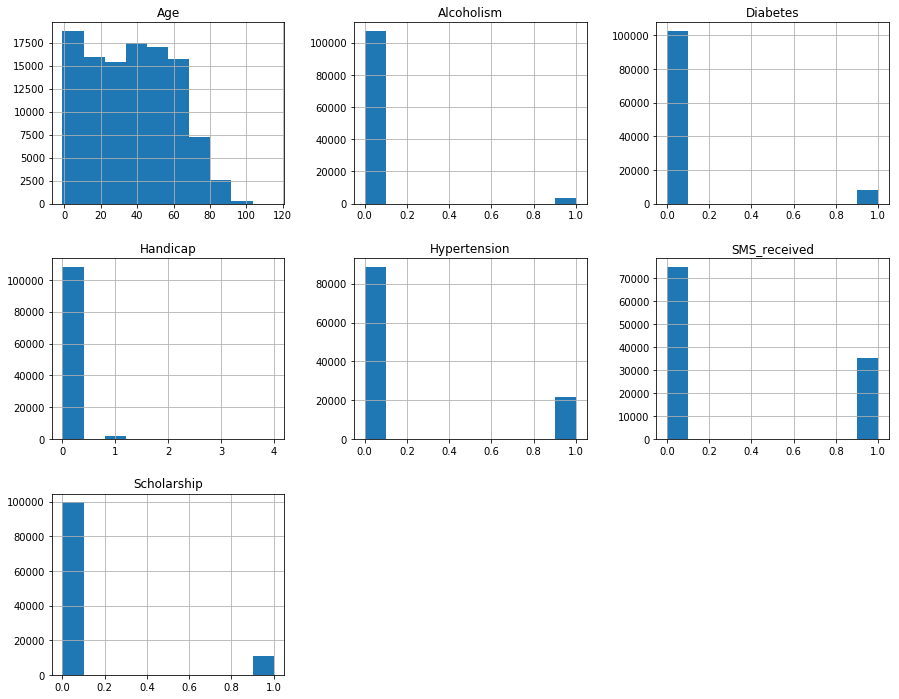

In [13]:
df.hist(figsize=(15,12)); #showing histograms for the whole data 

# notices on the data :
    1-most of the patients didnt suffer from chronic diseases.
    2-number of patients who recieved the SMS is approximately the half of the number for those who did not recieve the         messeges. 
    3-approximately 20000 patients out of 110000 are suffering from hypertension.

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings/9
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count() ,df[noshow].count()

(Gender           88208
 Age              88208
 Neighbourhood    88208
 Scholarship      88208
 Hypertension     88208
 Diabetes         88208
 Alcoholism       88208
 Handicap         88208
 SMS_received     88208
 No_show          88208
 dtype: int64, Gender           22319
 Age              22319
 Neighbourhood    22319
 Scholarship      22319
 Hypertension     22319
 Diabetes         22319
 Alcoholism       22319
 Handicap         22319
 SMS_received     22319
 No_show          22319
 dtype: int64)

In [15]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handicap         88208
SMS_received     88208
No_show          88208
dtype: int64

In [16]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
dtype: int64

In [31]:
# to determine the type of gender in the data:
print("Uniquevaluesin'Gender'",df.Gender.unique())

Uniquevaluesin'Gender' ['F' 'M']


In [22]:
# To identify the number of each group:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

# total number of patients in each group:
number of showed patients are 88208 ,
number of non showed are 22319


In [17]:
df[show].mean(),df[noshow].mean()

(Age             37.790064
 Scholarship      0.093903
 Hypertension     0.204392
 Diabetes         0.073837
 Alcoholism       0.030417
 Handicap         0.022742
 SMS_received     0.291334
 dtype: float64, Age             34.317667
 Scholarship      0.115507
 Hypertension     0.169004
 Diabetes         0.064071
 Alcoholism       0.030333
 Handicap         0.020297
 SMS_received     0.438371
 dtype: float64)

### Research Question # 1 (Factors affecting the rate of attendance!)
DOES THE AGE FACTOR AFFECTS THE ATTENDANCE OF PATIENTS ?

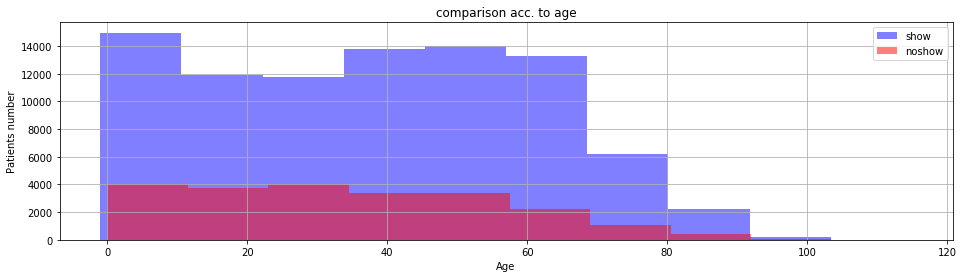

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
def attendance(df,col_name,attended,absent):
    
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
    df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
    plt.legend()
    plt.title('comparison acc. to age')
    plt.xlabel('Age')
    plt.ylabel('Patients number');
attendance(df,'Age',show,noshow)

# the age from zero years to 8 years approx.seems to be the most showing or attending .
#after the age of 70 the attendance decreases .

## Research Question # 2 (Factors affecting the rate of attendance!)
DOES THE CHRONIC DISEASES FACTOR AFFECT THE ATTENDANCE OF PATIENTS ?

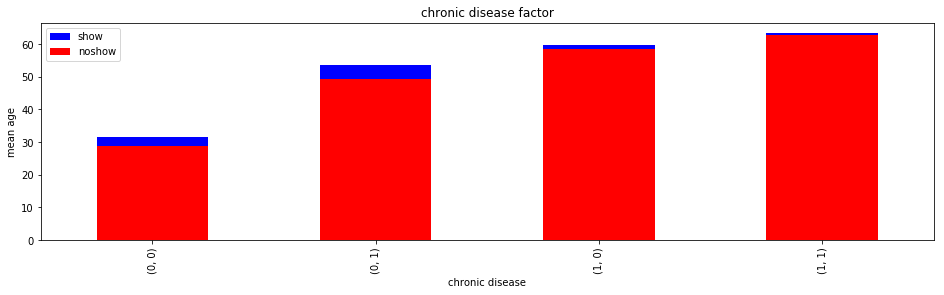

In [19]:
#does the age and chronic diseases affect the attendance rate:
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('chronic disease factor')
plt.xlabel('chronic disease')
plt.ylabel('mean age');

In [20]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           31.509962
               1           53.666952
 1             0           59.702144
               1           63.406361
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.834155
               1           49.183391
 1             0           58.377043
               1           62.820333
 Name: Age, dtype: float64)

# it appears that the mean age of non chronic diseases showing patients is 31.5 and non showing is 28 mean age,

## Research Question # 3 (Factors affecting the rate of attendance!)
DOES THE AGE, GENDER FACTORS AFFECTS THE ATTENDANCE OF PATIENTS ?

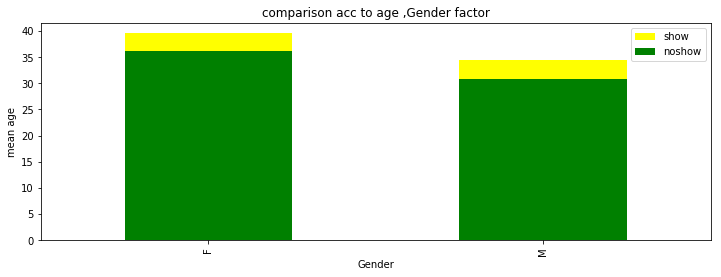

In [27]:
plt.figure(figsize=[12,4])
df[show].groupby(['Gender']).Age.mean().plot(kind='bar',color='yellow',label='show')
df[noshow].groupby(['Gender']).Age.mean().plot(kind='bar',color='green',label='noshow')
plt.legend();
plt.title('comparison acc to age ,Gender factor')
plt.xlabel('Gender')
plt.ylabel('mean age');

# from the previous plot, it seems that age has no affect on the attendance.

## Research Question 4 (Factors affecting the rate of attendance!)
DOES RECIEVING THE SMS AFFECTS THE ATTENDANCE OF PATIENTS ?

In [32]:
plt.figure(figsize=[16,4])
df[col_name][show].hist(alpha=.5,bins=15,color='green',label='show')
df[col_name][noshow].hist(alpha=.5,bins=15,color='red',label='noshow')
plt.legend();
plt.legend('comparison acc. to recieving the SMS')
plt.xlabel('SMS')
plt.ylabel('Patients number');
attendance(df,'SMS_received',show,noshow)

NameError: name 'col_name' is not defined

# the number of patients attended without recieving the SMS is more than the number of patients who recieved the SMS.


## Research Question #5 (Factors affecting the rate of attendance!)
#DOES THE NEIGHBOURHOOD AFFECTS THE ATTENDANCE OF PATIENTS ?

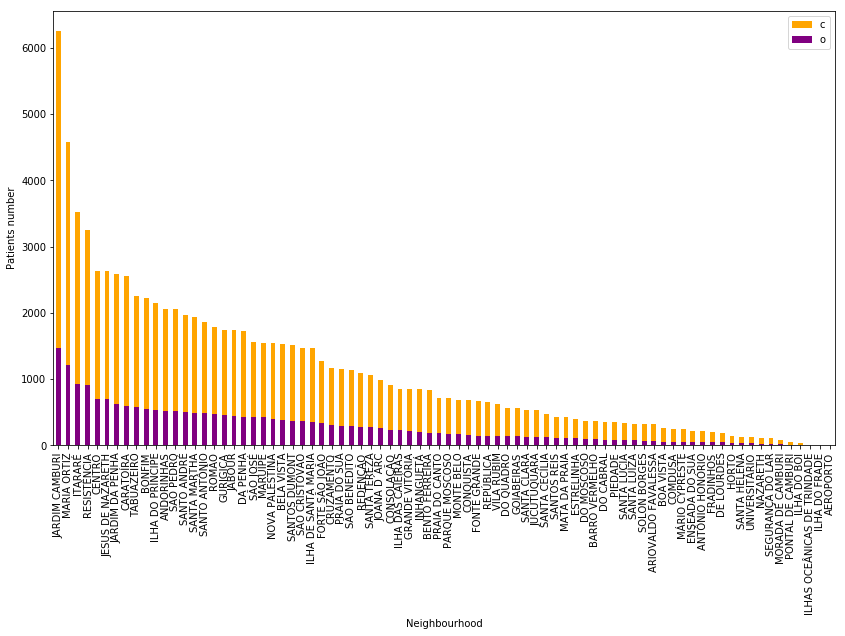

In [29]:
plt.figure(figsize=[14,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='orange',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='purple',label='noshow')
plt.legend()
plt.legend('comparison acc. to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients number');

# Neighbourhood has a great effect on Patients number affecting the attendance may be due to the word of mouth between neighbours .
(JARDIM CAMBURI) has the greatest number of attending patients.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

1- Neighbourhood has a great effect on attendance of patients , espicially from the area named (JARDIM CAMBURI).
2- Recieving the SMS affected the showing patients adversely.may be due to technical issues.
3- Age has an effect on showing patients .
4- No clear relation between the Gender and chronic diseases.




### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.
# 1-The data consists of (110527 rows x 14 columns).
# 2- the age from zero years to 8 years approx.seems to be the most showing or attending .after the age of 70 the attendance decreases 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])